### Домашнее задание к лекции "Кейс стади"

### Задание 1

Вернемся к набору данных о видеоиграх.

Ответьте на следующие вопросы:

    1) Как критики относятся к спортивным играм?
    2) Критикам нравятся больше игры на PC или на PS4?
    3) Критикам больше нравятся стрелялки или стратегии?

Для каждого вопроса:

    -сформулируйте нулевую и альтернативную гипотезы;
    -выберите пороговый уровень статистической значимости;
    -опишите полученные результаты статистического теста.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import re

In [2]:
df = pd.read_csv('video_games_sales.csv')
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


In [3]:
df.shape # узнаем кол-во строк, столбцов

(55792, 23)

In [4]:
#посмотрим на весь список жанров, может мы потеряли еще один спортивный жанр или имеется ошибка в датасете
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Shooter', 'Role-Playing',
       'Puzzle', 'Misc', 'Party', 'Simulation', 'Action',
       'Action-Adventure', 'Fighting', 'Strategy', 'Adventure', 'Music',
       'MMO', 'Sandbox', 'Visual Novel', 'Board Game', 'Education'],
      dtype=object)

In [5]:
# сделаем выборку только той информации, которая нам нужна
sports = df[df['Genre']=='Sports'].Critic_Score.dropna()
other = df[df['Genre']!='Sports'].Critic_Score.dropna()
print('Средняя оценка спортивных жанров:', sports.mean())
print('Средняя оценка остальных жанров: ', other.mean())

Средняя оценка спортивных жанров: 7.291424418604655
Средняя оценка остальных жанров:  7.2045656634747255


Сформулируем гипотезу:

    Н0: критики относятся к спортивным играм также, как и к остальным жанрам
    Н1: критики по особому оценивают игры в спортивном жанре
Уровень значимости оставим на 5% или alpha = 0.05

Сперва посмотрим на диаграмму данных, посмотрим на тип распределения, чтобы выбрать стат. критерий. Далее сделаем расчет

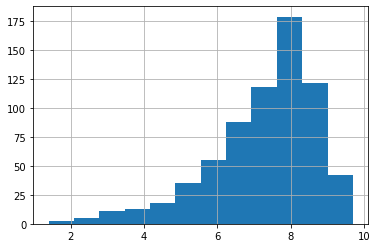

In [6]:
sports.hist(bins = 12)

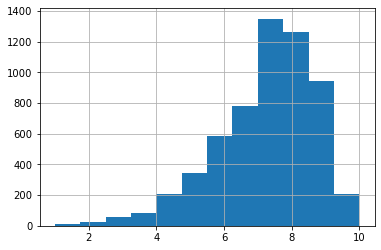

In [7]:
other.hist(bins = 12)

In [8]:
# Из-заа того, что диаграммы неравномерны, будем использовать метод Манна-Уитни
from scipy.stats import mannwhitneyu

alpha = 0.05
stat, p = mannwhitneyu(sports, other)
print('Statistics = %.3f, p = %.3f' % (stat, p))
if p > alpha: 
    print('Принимаем нулевую гипотезу: критики относятся к спортивным играм также, как и к остальным жанрам') 
else: 
    print('Принимаем альтернативную гипотезу: критики лучше оценивают игры в спортивном жанре') 

Statistics = 1910301.500, p = 0.015
Принимаем альтернативную гипотезу: критики лучше оценивают игры в спортивном жанре


#### Критикам нравятся больше игры на PC или на PS4?

    H0: Критики равнозначно относятся к играм на PC и PS4;
    Н1: Критики по разному относятся к играм на PC и PS4.


In [9]:
# сделаем выборку только той информации, которая нам нужна
pc = df[df['Platform']=='PC'].Critic_Score.dropna()
ps4 = df[df['Platform']=='PS4'].Critic_Score.dropna()
print('Средняя оценка игр на PC: ', pc.mean())
print('Средняя оценка игр на PS4:', ps4.mean())

Средняя оценка игр на PC:  7.541849710982658
Средняя оценка игр на PS4: 7.904587155963299


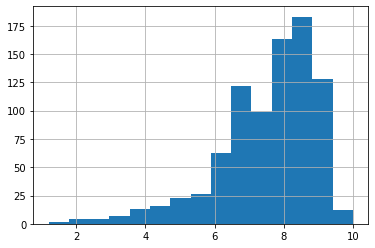

In [10]:
pc.hist(bins = 15)

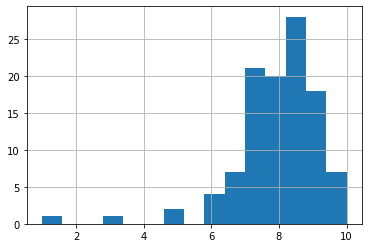

In [11]:
ps4.hist(bins = 15)

In [12]:
# Попробуем для расчетов использовать t-тест Стьюдента
result = st.ttest_ind(pc, ps4, equal_var=False)
print(result)

if (result.statistic > 0) & (result.pvalue / 2 < alpha):
    print('Отвергаем нулевую гипотезу, Критики по разному относятся к играм на PC и PS4')
else:
    print('Принимаем нулевую гипотизу, Критики равнозначно относятся к играм на PC и PS4')

Ttest_indResult(statistic=-2.7394476056351627, pvalue=0.006931808250254211)
Принимаем нулевую гипотизу, Критики равнозначно относятся к играм на PC и PS4


#### Критикам больше нравятся стрелялки или стратегии?

    H0: Критикам нравятся и стрелялки и стратегии;
    Н1: Критики любят больше стратегии, чем стрелялки.

In [13]:
# сделаем выборку только той информации, которая нам нужна, выведем средние
shooter = df[df['Genre']=='Shooter'].Critic_Score.dropna()
strategy = df[df['Genre']=='Strategy'].Critic_Score.dropna()
print('Средняя оценка шутеров:  ', shooter.mean())
print('Средняя оценка стратегий:', strategy.mean())

Средняя оценка шутеров:   7.2868327402135264
Средняя оценка стратегий: 7.429268292682925


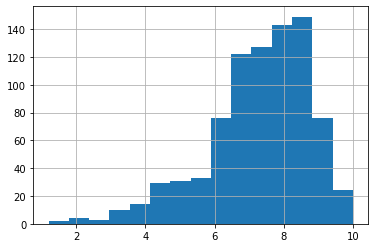

In [14]:
shooter.hist(bins = 15)

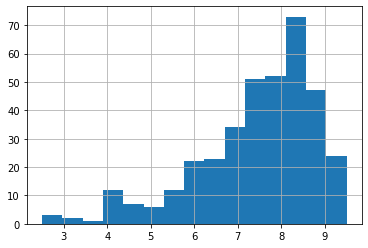

In [15]:
strategy.hist(bins = 15)

In [16]:
# исходя из графика, будем использовать метод Манна-Уитни
alpha = 0.05
stat_1, p_1 = mannwhitneyu(shooter, strategy)

print('Statistics = %.3f, p = %.3f' % (stat_1, p_1))
if p_1 > alpha: 
    print('Принимаем нулевую гипотезу: Критикам нравятся одинаково и стрелялки и стратегии') 
else: 
    print('Принимаем альтернативную гипотезу: Критики любят больше стратегии, чем стрелялки') 

Statistics = 146660.500, p = 0.057
Принимаем нулевую гипотезу: Критикам нравятся одинаково и стрелялки и стратегии



### Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные здесь) по признаку спама. Для этого:

    1) Привидите весь текст к нижнему регистру;
    2) Удалите мусорные символы;
    3) Удалите стоп-слова;
    4) Привидите все слова к нормальной форме;
    5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:

        from sklearn.feature_extraction.text import TfidfVectorizer

        tfidf = TfidfVectorizer()
        tfidf_matrix = tfidf.fit_transform(df.Message)
        names = tfidf.get_feature_names()
        tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=cname)

Можете поэкспериментировать с параметрами TfidfVectorizer;

    6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите random_state=42. Используйте train_test_split;
    7) Постройте модель логистической регрессии, укажите random_state=42, оцените ее точность на тестовых данных;
    8) Опишите результаты при помощи confusion_matrix;
    9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).


In [17]:
spam = pd.read_csv('spam.csv')
spam

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [18]:
# установим недостающие пакеты для NLTK вызовом команды:
# import nltk
# nltk.download()
# загрузим brown, stopwords, wordnet

In [19]:
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer

In [20]:
def message_done(row):
    low = row.lower()   #1.Привидем весь текст к нижнему регистру;
    words = re.sub(r'[\W_]+',' ', low)   #2. Удалим мусорные символы;
    split = words.split()   # Разобьем наш текст  
    stopwords_set = set(stopwords.words('english'))   #3. Удалим стоп-слова;
    without_stopwords = [word for word in split if word not in stopwords_set]
    
    lemmatizer = WordNetLemmatizer()  #Приведем слова к нормальной форме (лемматизируем)
    lemma_text = [lemmatizer.lemmatize(word) for word in without_stopwords]
    
    row_f = ' '.join(map(str, lemma_text)) #вернем строку
    return row_f

In [21]:
spam['Message'] = spam['Message'].apply(message_done)
spam.head()

,Category,Message
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah think go usf life around though


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(spam.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=None)

tfidf_matrix

,0,1,2,3,4,5,6,7,8,9,...,8038,8039,8040,8041,8042,8043,8044,8045,8046,8047
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Разделим данные на тестовую и тренировочную в соотношении 30/70, укажим random_state=42. Используем train_test_split

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [24]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, spam['Category'], test_size=0.3, random_state = 42)

# Обращаемся к logisticRegression() и записываем в переменную log_regression
log_regression = LogisticRegression(random_state = 42)
log_regression.fit(X_train, y_train) #тренируем модель

y_pred = log_regression.predict(X_test)  #прогнозируем выборку

# Опишем результаты при помощи confusion_matrix
print('Матрица неточности(confusion_matrix):') 
confusion_matrix(y_test, y_pred, labels=['ham', 'spam'])

Матрица неточности(confusion_matrix):


array([[1445,    3],
       [  66,  158]], dtype=int64)

Матрица показывает, что модель 66 раз ошиблась и предсказала, что ham - это spam. 3 раза ложных отрицания.

In [25]:
# Выведем финальный датафрейм
spam['Real'] = pd.DataFrame(y_test)
spam['Prediction'] = pd.DataFrame(y_pred)
final = spam[spam.Real != spam.Prediction]
final.drop(['Category'], axis=1).dropna()

,Message,Real,Prediction
8,winner valued network customer selected receiv...,spam,ham
12,urgent 1 week free membership 100 000 prize ja...,spam,ham
15,xxxmobilemovieclub use credit click wap link n...,spam,ham
17,eh u remember 2 spell name yes v naughty make ...,ham,spam
19,england v macedonia dont miss goal team news t...,spam,ham
...,...,...,...
1544,hello orange 1 month free access game news spo...,spam,ham
1564,get ready put excellent sub face,ham,spam
1583,yep derek house see sunday lt 3,ham,spam
1598,urgent mobile number awarded 2000 prize guaran...,spam,ham
